# Plotting a Neural Network's Boundary 

In [1]:
# imports
import numpy
import pandas
import matplotlib.pyplot as plt
import _plotting

In [2]:
# Helpers
def one_off_plot_decision_boundary_2D(function):
    """
    This one takes in a heuristic function to calculate some alternate portion
    of the Z axis based on the x and y grids. 
    It's based off the plot_decision_boundary_2D in _plotting.

    Function must be a two-valued surface, f(x,y)

    TODO: One-Off because we restrict ourselves above the z = 0.5 plane 
    """
    _plotting.plot_scatter(X['aack'][y == 0], X['beep'][y == 0], marker = 's')
    _plotting.plot_scatter(X['aack'][y == 1], X['beep'][y == 1], marker = '^')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(["aack", "beep"])

    def h(x,y):
        """ Restrict to z = 0.5 """
        return function(x,y) >= 0.5 # hard coded

    # Hard coded
    xx, yy = numpy.meshgrid(
        numpy.arange(-0.5,3,0.005),
        numpy.arange(-0.5,3,0.005)
    )
    # One-off
    Z = numpy.array([h(i[0], i[1]) for i in numpy.c_[xx.ravel(), yy.ravel()]])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.25, levels=range(-1,2))
    plt.contour(xx, yy, Z, colors = 'k', linewidths = 3)
    plt.show()

def step(x):
    """
    Returns 1 or 0 since Bool * int is int
    """
    return (x >= 0)*1

def sigmoid(x):
    """
    Note: The book's version is 1/(1+exp(-x)).
    Our version exp(x) / (1 + exp(x)) is an equivalent expression.
    But this behaves better with small floating point numbers.
    """
    exponential = numpy.exp(x)
    denom = numpy.add(1, exponential)

    result = numpy.divide(exponential, denom)
    result = numpy.minimum(result, 0.9999)  # Set upper bound
    result = numpy.maximum(result, 0.0001)  # Set lower bound
    
    return result

## Toy dataset

In [3]:
alien_Xset = pandas.DataFrame({
    'aack':[1,2,0,0,1,1,2,2],
    'beep':[0,0,1,2,1,2,1,2],
    'happy': [0,0,0,0,1,1,1,1]})

X = alien_Xset[['aack', 'beep']]
y = alien_Xset['happy']


## Example surfaces (lines & 2D planes)

In [4]:
def line_1(a,b):
    return step(6*a + 10*b - 15)

def line_2(a,b):
    return step(10*a + 6*b - 15)

def bias(a,b):
    return 1

def nn_with_step(a,b):
    return step(step(6*a + 10*b - 15) + step(10*a + 6*b - 15) - 1.5)

def nn_with_sigmoid(a,b):
    return sigmoid(1.0*sigmoid(6*a + 10*b - 15) + 1.0*sigmoid(10*a + 6*b - 15) - 1.5)

## Boundaries of the first layer (linear classifiers and bias)

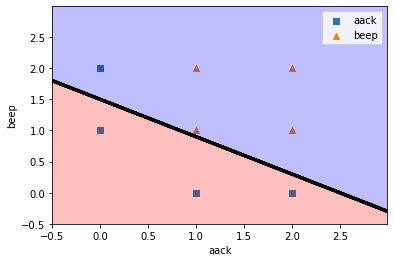

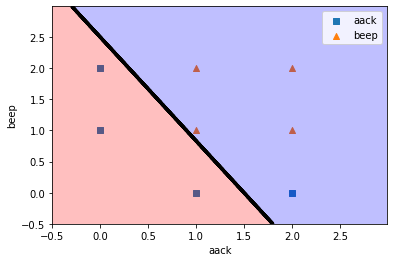

C:\Users\Diego\AppData\Local\Temp/ipykernel_12092/2369674455.py:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors = 'k', linewidths = 3)


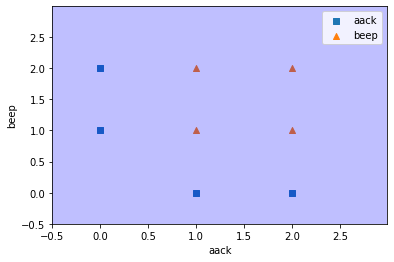

In [5]:
one_off_plot_decision_boundary_2D(line_1)
one_off_plot_decision_boundary_2D(line_2)
one_off_plot_decision_boundary_2D(bias)

## Boundaries of the second layer (non-linear classifiers)

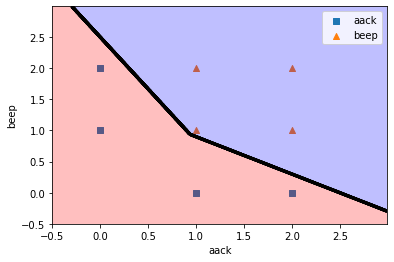

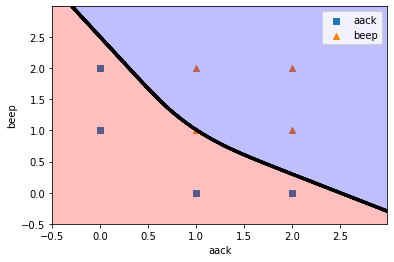

In [6]:
one_off_plot_decision_boundary_2D(nn_with_step)
one_off_plot_decision_boundary_2D(nn_with_sigmoid)